In [ ]:
!pip install numpy pandas matplotlib seaborn plotly

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
df= pd.read_csv("/content/ai_job_market_insights.csv")
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
df.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
df.isna().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


In [ ]:
df[df['Job_Title'].duplicated(keep=False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [ ]:
df.head(1)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth


In [ ]:
df.Job_Title.value_counts()

,count
Job_Title,
Data Scientist,62
HR Manager,57
Cybersecurity Analyst,55
UX Designer,54
AI Researcher,51
Sales Manager,49
Marketing Specialist,48
Operations Manager,44
Software Engineer,41


In [ ]:
value_counts = df['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']

fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Count of Each Job Title',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,
    xaxis=dict(tickangle=-45
    )
)

fig.show()

In [ ]:
value_counts=df.Industry.value_counts()
value_counts

,count
Industry,
Manufacturing,58
Education,57
Technology,56
Finance,53
Telecommunications,53
Energy,49
Entertainment,47
Retail,46
Healthcare,42


In [ ]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']

fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count',
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(tickangle=0
    )
)

fig.show()

In [ ]:
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,171
1,Large,166
2,Medium,163


In [ ]:
value_counts.columns = ['Company_Size', 'Count']

fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)

fig.update_layout(
    title_x=0.5
)

fig.show()

In [ ]:
df.Location.value_counts()

,count
Location,
San Francisco,62
Singapore,54
Sydney,52
Dubai,51
Tokyo,51
New York,49
Berlin,48
London,46
Paris,46


In [ ]:
value_counts = df['Location'].value_counts().reset_index()
value_counts.columns = ['Location', 'Count']

# Create a bar chart
fig = px.bar(
    value_counts,
    x='Location',
    y='Count',
    title='Distribution of Locations',
    labels={'Count': 'Count', 'Location': 'Location'},
    color='Count',  # Optional: color bars by count for better distinction
    color_continuous_scale='Viridis'  # Optional: choose a color scale
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Count',
    title_x=0.5,  # Center the title
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels for better readability
    )
)

# Show the plot
fig.show()

In [ ]:
value_counts=df["AI_Adoption_Level"].value_counts()
value_counts

,count
AI_Adoption_Level,
Medium,179
Low,174
High,147


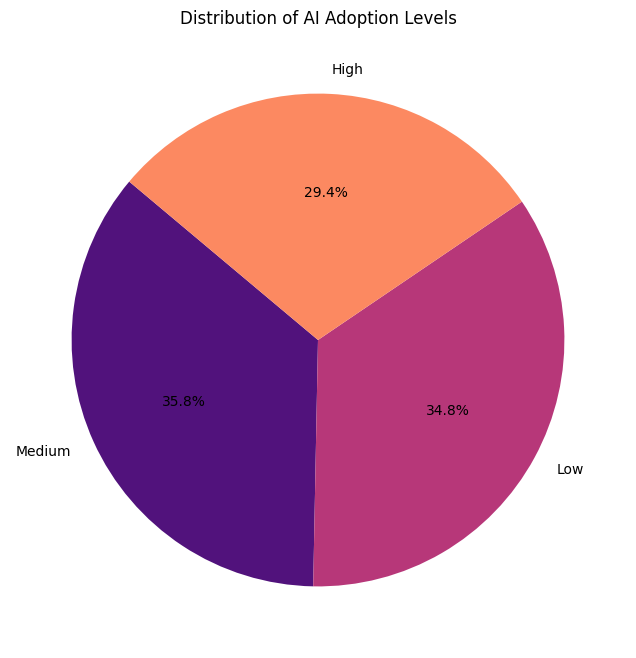

In [ ]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

In [ ]:
df.Automation_Risk.value_counts()

,count
Automation_Risk,
Medium,173
High,169
Low,158


In [ ]:
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Python,60
2,Cybersecurity,58
3,Machine Learning,52
4,UX/UI Design,49
5,Sales,49
6,Data Analysis,49
7,Marketing,45
8,JavaScript,44
9,Communication,34


In [ ]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig.update_layout(
    title_x=0.5
)

In [ ]:
df.Salary_USD.min()

31969.52634612842

In [ ]:
df.Salary_USD.max()

155209.82161382848

In [ ]:
df.Salary_USD.mean()

91222.39097411344

In [ ]:
df["Salary_USD"].value_counts()

,count
Salary_USD,
111392.165243,1
116713.117943,1
104854.999236,1
139078.066919,1
97811.878124,1
...,...
100575.362116,1
98153.125072,1
98036.517081,1


In [ ]:
fig = px.box(
    df,
    x='Salary_USD',
    title='Boxplot of Salary (USD)',
    color_discrete_sequence=['skyblue']
)

fig.show()

In [ ]:
fig = px.histogram(df, x='Salary_USD', nbins=20, title='Histogram of Salary [USD]', color_discrete_sequence=['purple '])
fig.update_xaxes(title_text='Salary (USD)')
fig.update_yaxes(title_text='Count')
fig.show()

In [ ]:
df["Remote_Friendly"].value_counts()

,count
Remote_Friendly,
Yes,251
No,249


In [ ]:
value_counts = df['Remote_Friendly'].value_counts().reset_index()
value_counts.columns = ['Remote_Friendly', 'Count']
fig = px.pie(
    value_counts,
    names='Remote_Friendly',
    values='Count',
    title='Distribution of Remote Friendly Jobs',

)

fig.show()

In [ ]:
df.Job_Growth_Projection.value_counts()

,count
Job_Growth_Projection,
Growth,169
Decline,169
Stable,162


**About Dataset**

Dataset Description: "AI-Powered Job Market Insights"
Overview:
The "AI-Powered Job Market Insights" dataset provides a synthetic but realistic snapshot of the modern job market, particularly focusing on the role of artificial intelligence (AI) and automation across various industries. This dataset includes 500 unique job listings, each characterized by different factors like industry, company size, AI adoption level, automation risk, required skills, and job growth projections. It is designed to be a valuable resource for researchers, data scientists, and policymakers exploring the impact of AI on employment, job market trends, and the future of work.

**Dataset Features:**

**Job_Title:**

Description: The title of the job role.
Type: Categorical
Example Values: "Data Scientist", "Software Engineer", "HR Manager"

**Industry:**

Description: The industry in which the job is located.
Type: Categorical
Example Values: "Technology", "Healthcare", "Finance"

**Company_Size:**

Description: The size of the company offering the job.
Type: Categorical
Categories: "Small", "Medium", "Large"

**Location:**

Description: The geographic location of the job.
Type: Categorical
Example Values: "New York", "San Francisco", "London"

**AI_Adoption_Level:**

Description: The extent to which the company has adopted AI in its operations.
Type: Categorical
Categories: "Low", "Medium", "High"

Automation_Risk:

Description: The estimated risk that the job could be automated within the next 10 years.
Type: Categorical
Categories: "Low", "Medium", "High"

**Required_Skills:**

Description: The key skills required for the job role.
Type: Categorical
Example Values: "Python", "Data Analysis", "Project Management"

**Salary_USD:**

Description: The annual salary offered for the job in USD.
Type: Numerical
Value Range: $30,000 - $200,000

**Remote_Friendly:**

Description: Indicates whether the job can be performed remotely.
Type: Categorical
Categories: "Yes", "No"

**Job_Growth_Projection:**

Description: The projected growth or decline of the job role over the next five years.
Type: Categorical
Categories: "Decline", "Stable", "Growth"

**Potential Use Cases:**
AI and Job Market Research: Analyzing the impact of AI adoption on different industries and job roles.
Skill Gap Analysis: Understanding which skills are in demand across industries and how AI influences this demand.
Policy Making: Assisting policymakers in identifying job roles at high risk of automation and strategizing for workforce transitions.
Salary Analysis: Exploring the correlation between AI adoption and salary ranges across different job titles and locations.
**Notes:**
This dataset is entirely synthetic and generated for educational and research purposes. While it mimics real-world data, it does not represent any actual company, job, or individual. The data can be used to model, predict, and analyze trends in the AI-driven job market but should not be used for real-world decision-making without validation against actual data.